### Train image based CNN (VGG19) on power melspectrogram images extracted from respiratory audio files.
Import all functions.All required functionality has been packaged in readymade functions

In [1]:
from utils import *

Initialize **paths**. It provides paths for all required files using convenient variable keys.

In [2]:
dataset_path = '/project/Vikas/projects/kaggle/respiratory_sounds_database'
paths        = get_dataset_dirs(root_dir=dataset_path)
print(paths)

Dataset root_dir    =  /project/Vikas/projects/kaggle/respiratory_sounds_database
demographic_file    =  /project/Vikas/projects/kaggle/respiratory_sounds_database/demographic_info.txt
audio_txt_pdir      =  /project/Vikas/projects/kaggle/respiratory_sounds_database/respiratory_sound_database/Respiratory_Sound_Database
audio_txt_dir       =  /project/Vikas/projects/kaggle/respiratory_sounds_database/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files
filename_diff_file  =  /project/Vikas/projects/kaggle/respiratory_sounds_database/respiratory_sound_database/Respiratory_Sound_Database/filename_differences.txt
filename_fmt_file   =  /project/Vikas/projects/kaggle/respiratory_sounds_database/respiratory_sound_database/Respiratory_Sound_Database/filename_format.txt
patient_diag_file   =  /project/Vikas/projects/kaggle/respiratory_sounds_database/respiratory_sound_database/Respiratory_Sound_Database/patient_diagnosis.csv
{'dataset_root_dir': '/project/Vikas/projects/ka

#### Initialize dataset

In [3]:
dataset = populate_dataset_spectrogram_images(paths, sr=22050, remove_rare=True, n_jobs=32, test_size_ratio=0.2)

Saving spectrograms.: 100%|██████████| 917/917 [02:01<00:00,  7.53it/s]
Copying files: 917 files [00:00, 10883.91 files/s]


Found 731 images belonging to 6 classes.
Found 186 images belonging to 6 classes.


In [4]:
train_gen, val_gen = dataset

In [7]:
sample_feats, sample_labels = train_gen.next()
print(sample_feats.shape)

(32, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sample spectrogram


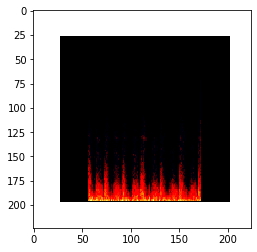

In [9]:
print('Sample spectrogram')
plt.imshow(sample_feats[0])

#### Train model

In [10]:
model = train_model_mspectrogram(dataset, num_epochs=50, model_name='vgg19')

Train for 23 steps, validate for 6 steps
Epoch 1/50
22/23 [===========================>..] - ETA: 0s - loss: 0.7482 - accuracy: 0.8269
Epoch 00001: val_accuracy improved from -inf to 0.85484, saving model to checkpoints2/mymodel2_01.h5
23/23 [==============================] - 14s 606ms/step - loss: 0.7535 - accuracy: 0.8249 - val_loss: 0.5920 - val_accuracy: 0.8548
Epoch 2/50
22/23 [===========================>..] - ETA: 0s - loss: 0.5460 - accuracy: 0.8670
Epoch 00002: val_accuracy did not improve from 0.85484
23/23 [==============================] - 8s 366ms/step - loss: 0.5428 - accuracy: 0.8673 - val_loss: 0.5527 - val_accuracy: 0.8548
Epoch 3/50
22/23 [===========================>..] - ETA: 0s - loss: 0.4896 - accuracy: 0.8670
Epoch 00003: val_accuracy did not improve from 0.85484
23/23 [==============================] - 8s 367ms/step - loss: 0.4861 - accuracy: 0.8673 - val_loss: 0.4932 - val_accuracy: 0.8548
Epoch 4/50
22/23 [===========================>..] - ETA: 0s - loss: 0.42

Epoch 29/50
22/23 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 00029: val_accuracy did not improve from 0.93548
23/23 [==============================] - 9s 370ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3841 - val_accuracy: 0.9301
Epoch 30/50
22/23 [===========================>..] - ETA: 0s - loss: 7.0608e-04 - accuracy: 1.0000
Epoch 00030: val_accuracy did not improve from 0.93548
23/23 [==============================] - 9s 376ms/step - loss: 7.4377e-04 - accuracy: 1.0000 - val_loss: 0.3645 - val_accuracy: 0.9194
Epoch 31/50
22/23 [===========================>..] - ETA: 0s - loss: 3.7728e-04 - accuracy: 1.0000
Epoch 00031: val_accuracy did not improve from 0.93548
23/23 [==============================] - 9s 374ms/step - loss: 4.3145e-04 - accuracy: 1.0000 - val_loss: 0.3687 - val_accuracy: 0.9194
Epoch 32/50
22/23 [===========================>..] - ETA: 0s - loss: 3.2142e-04 - accuracy: 1.0000
Epoch 00032: val_accuracy did not improve 

#### Pick best model and get validation score

In [20]:
model = tf2_models.get_model_fn_map()['vgg19'](6)
model = compile_model(model)
model.load_weights('checkpoints2/mymodel2_15.h5')
scores = model.evaluate(val_gen)

6/6 [==============================] - 1s 186ms/step - loss: 0.2268 - accuracy: 0.9355
